In [1]:
library("tidyverse")
library("reshape2")

Warning message:
"package 'tidyverse' was built under R version 3.4.4"-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
√ ggplot2 3.0.0     √ purrr   0.2.5
√ tibble  1.4.2     √ dplyr   0.7.5
√ tidyr   0.8.1     √ stringr 1.3.0
√ readr   1.1.1     √ forcats 0.3.0
Warning message:
"package 'ggplot2' was built under R version 3.4.4"Warning message:
"package 'tidyr' was built under R version 3.4.4"Warning message:
"package 'purrr' was built under R version 3.4.4"Warning message:
"package 'dplyr' was built under R version 3.4.4"-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Attaching package: 'reshape2'

The following object is masked from 'package:tidyr':

    smiths



In [2]:
taxa <- read.delim("Description_otu_table_L6.txt", sep='\t', row=1)
head(taxa)

,KHASs,HKAs
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter,0,3.474310e-04
k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera,0,2.159476e-05
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__Marine group II;g__,0,5.318907e-08
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__TMEG;g__,0,1.063781e-07
k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__vadinCA11,0,4.787016e-07
k__Bacteria;p__Acidobacteria;c__AT-s2-57;o__;f__;g__,0,5.318907e-08


In [3]:
split <- strsplit(rownames(taxa),";")
head(rownames(taxa))

[1] "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanobrevibacter"
[2] "k__Archaea;p__Euryarchaeota;c__Methanobacteria;o__Methanobacteriales;f__Methanobacteriaceae;g__Methanosphaera"    
[3] "k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__Marine group II;g__"                                       
[4] "k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__TMEG;g__"                                                  
[5] "k__Archaea;p__Euryarchaeota;c__Thermoplasmata;o__E2;f__[Methanomassiliicoccaceae];g__vadinCA11"                   
[6] "k__Bacteria;p__Acidobacteria;c__AT-s2-57;o__;f__;g__"

In [4]:
head(split)

[[1]]
[1] "k__Archaea"             "p__Euryarchaeota"       "c__Methanobacteria"    
[4] "o__Methanobacteriales"  "f__Methanobacteriaceae" "g__Methanobrevibacter" 

[[2]]
[1] "k__Archaea"             "p__Euryarchaeota"       "c__Methanobacteria"    
[4] "o__Methanobacteriales"  "f__Methanobacteriaceae" "g__Methanosphaera"     

[[3]]
[1] "k__Archaea"         "p__Euryarchaeota"   "c__Thermoplasmata" 
[4] "o__E2"              "f__Marine group II" "g__"               

[[4]]
[1] "k__Archaea"        "p__Euryarchaeota"  "c__Thermoplasmata"
[4] "o__E2"             "f__TMEG"           "g__"              

[[5]]
[1] "k__Archaea"                    "p__Euryarchaeota"             
[3] "c__Thermoplasmata"             "o__E2"                        
[5] "f__[Methanomassiliicoccaceae]" "g__vadinCA11"                 

[[6]]
[1] "k__Bacteria"      "p__Acidobacteria" "c__AT-s2-57"      "o__"             
[5] "f__"              "g__"

In [5]:
taxaStrings <- sapply(split,function(x) paste(x[1:6],collapse=";"))
gtaxa <- taxa
splitg <- strsplit(rownames(gtaxa),";")                               # Split and rejoin on lv7
gtaxaStrings <- sapply(splitg,function(x) paste(x[1:6],collapse=";")) # level 7 is species, 8 is strain
gtaxa <- rowsum(gtaxa,gtaxaStrings)                                    # Collapse by taxonomy name
gtaxa <- sweep(gtaxa,2,colSums(gtaxa),'/')
gtaxa <- gtaxa[order(rowMeans(gtaxa),decreasing=T),]

In [6]:
filtered.taxa <- gtaxa * 100
etc <- gtaxa[gtaxa$KHASs >= 0.01 & gtaxa$HKAs >= 0.01,]
#filtered.taxa <- gtaxa * 100
#traspose to add to map for later use
etc <- t(etc)
colnames(etc) <- gsub(".*;g__?", "", colnames(etc))
colnames(etc) <- gsub("_", "", colnames(etc))
colnames(etc) <- gsub(";.*","",colnames(etc))

etc

,Bacteroides,Prevotella,,Faecalibacterium,,,,Lachnospira,Parabacteroides,Dialister
KHASs,0.4296784,0.2434657,0.04651212,0.03074503,0.02022658,0.05414939,0.01274290,0.02292239,0.01280646,0.01188490
HKAs,0.2451353,0.1611135,0.10990261,0.06539437,0.06017077,0.02105090,0.04430038,0.01366294,0.01592098,0.01404761


In [7]:
etc <- as.data.frame(etc)
etc$Others <-  1- rowSums(etc)
etc

,Bacteroides,Prevotella,V3,Faecalibacterium,V5,V6,V7,Lachnospira,Parabacteroides,Dialister,Others
KHASs,0.4296784,0.2434657,0.04651212,0.03074503,0.02022658,0.05414939,0.01274290,0.02292239,0.01280646,0.01188490,0.1148662
HKAs,0.2451353,0.1611135,0.10990261,0.06539437,0.06017077,0.02105090,0.04430038,0.01366294,0.01592098,0.01404761,0.2493006


In [8]:
etc['KHASs',]

,Bacteroides,Prevotella,V3,Faecalibacterium,V5,V6,V7,Lachnospira,Parabacteroides,Dialister,Others
KHASs,0.4296784,0.2434657,0.04651212,0.03074503,0.02022658,0.05414939,0.0127429,0.02292239,0.01280646,0.0118849,0.1148662


In [9]:
etc[, order(colnames(etc))]

,Bacteroides,Dialister,Faecalibacterium,Lachnospira,Others,Parabacteroides,Prevotella,V3,V5,V6,V7
KHASs,0.4296784,0.01188490,0.03074503,0.02292239,0.1148662,0.01280646,0.2434657,0.04651212,0.02022658,0.05414939,0.01274290
HKAs,0.2451353,0.01404761,0.06539437,0.01366294,0.2493006,0.01592098,0.1611135,0.10990261,0.06017077,0.02105090,0.04430038


In [10]:
tmp <- etc[, order(colnames(etc))]
colnames(etc)
tmp <- t(etc)
head(etc)

[1] "Bacteroides"      "Prevotella"       "V3"               "Faecalibacterium"
 [5] "V5"               "V6"               "V7"               "Lachnospira"     
 [9] "Parabacteroides"  "Dialister"        "Others"

,Bacteroides,Prevotella,V3,Faecalibacterium,V5,V6,V7,Lachnospira,Parabacteroides,Dialister,Others
KHASs,0.4296784,0.2434657,0.04651212,0.03074503,0.02022658,0.05414939,0.01274290,0.02292239,0.01280646,0.01188490,0.1148662
HKAs,0.2451353,0.1611135,0.10990261,0.06539437,0.06017077,0.02105090,0.04430038,0.01366294,0.01592098,0.01404761,0.2493006


In [11]:
df <- melt(tmp, varnames=c("Genus", "Sample"), value.name="Proportion")
head(df)

Genus,Sample,Proportion
Bacteroides,KHASs,0.42967836
Prevotella,KHASs,0.24346569
V3,KHASs,0.04651212
Faecalibacterium,KHASs,0.03074503
V5,KHASs,0.02022658
V6,KHASs,0.05414939


In [12]:
tmp

,KHASs,HKAs
Bacteroides,0.42967836,0.24513534
Prevotella,0.24346569,0.16111352
V3,0.04651212,0.10990261
Faecalibacterium,0.03074503,0.06539437
V5,0.02022658,0.06017077
V6,0.05414939,0.02105090
V7,0.01274290,0.04430038
Lachnospira,0.02292239,0.01366294
Parabacteroides,0.01280646,0.01592098
Dialister,0.01188490,0.01404761


In [13]:
taxa <- row.names(tmp)
taxa

[1] "Bacteroides"      "Prevotella"       "V3"               "Faecalibacterium"
 [5] "V5"               "V6"               "V7"               "Lachnospira"     
 [9] "Parabacteroides"  "Dialister"        "Others"

In [14]:
sth <-as.data.frame(tmp)
sth

,KHASs,HKAs
Bacteroides,0.42967836,0.24513534
Prevotella,0.24346569,0.16111352
V3,0.04651212,0.10990261
Faecalibacterium,0.03074503,0.06539437
V5,0.02022658,0.06017077
V6,0.05414939,0.02105090
V7,0.01274290,0.04430038
Lachnospira,0.02292239,0.01366294
Parabacteroides,0.01280646,0.01592098
Dialister,0.01188490,0.01404761


In [15]:
sum(sth$KHASs)

[1] 1

In [16]:
sth$taxa <- row.names(sth)
sth

,KHASs,HKAs,taxa
Bacteroides,0.42967836,0.24513534,Bacteroides
Prevotella,0.24346569,0.16111352,Prevotella
V3,0.04651212,0.10990261,V3
Faecalibacterium,0.03074503,0.06539437,Faecalibacterium
V5,0.02022658,0.06017077,V5
V6,0.05414939,0.02105090,V6
V7,0.01274290,0.04430038,V7
Lachnospira,0.02292239,0.01366294,Lachnospira
Parabacteroides,0.01280646,0.01592098,Parabacteroides
Dialister,0.01188490,0.01404761,Dialister


In [17]:
row.names(sth) <- NULL
sth

KHASs,HKAs,taxa
0.42967836,0.24513534,Bacteroides
0.24346569,0.16111352,Prevotella
0.04651212,0.10990261,V3
0.03074503,0.06539437,Faecalibacterium
0.02022658,0.06017077,V5
0.05414939,0.02105090,V6
0.01274290,0.04430038,V7
0.02292239,0.01366294,Lachnospira
0.01280646,0.01592098,Parabacteroides
0.01188490,0.01404761,Dialister


In [18]:
sth %>% filter(taxa %in% c("V3", "V5", "V6", "V7", "Others"))

Warning message:
"package 'bindrcpp' was built under R version 3.4.4"

KHASs,HKAs,taxa
0.04651212,0.10990261,V3
0.02022658,0.06017077,V5
0.05414939,0.02105090,V6
0.01274290,0.04430038,V7
0.11486619,0.24930058,Others


In [19]:
sth %>% filter(taxa %in% c("V3", "V5", "V6", "V7", "Others")) %>% select(-taxa) %>% summarise_all(funs(sum))

KHASs,HKAs
0.2484972,0.4847252


In [20]:
others <- sth %>% filter(taxa %in% c("V3", "V5", "V6", "V7", "Others")) %>% select(-taxa) %>% summarise_all(funs(sum))
others$taxa <- "Others"
others

KHASs,HKAs,taxa
0.2484972,0.4847252,Others


In [21]:
mid <- sth %>% filter(!taxa %in% c("V3", "V5", "V6", "V7", "Others")) 
mid

KHASs,HKAs,taxa
0.42967836,0.24513534,Bacteroides
0.24346569,0.16111352,Prevotella
0.03074503,0.06539437,Faecalibacterium
0.02292239,0.01366294,Lachnospira
0.01280646,0.01592098,Parabacteroides
0.01188490,0.01404761,Dialister


In [22]:
final <- rbind(mid, others)
final

KHASs,HKAs,taxa
0.42967836,0.24513534,Bacteroides
0.24346569,0.16111352,Prevotella
0.03074503,0.06539437,Faecalibacterium
0.02292239,0.01366294,Lachnospira
0.01280646,0.01592098,Parabacteroides
0.01188490,0.01404761,Dialister
0.24849717,0.48472524,Others


In [23]:
final %>% select(-taxa) %>% summarise_all(sum)

KHASs,HKAs
1,1


In [24]:
final

KHASs,HKAs,taxa
0.42967836,0.24513534,Bacteroides
0.24346569,0.16111352,Prevotella
0.03074503,0.06539437,Faecalibacterium
0.02292239,0.01366294,Lachnospira
0.01280646,0.01592098,Parabacteroides
0.01188490,0.01404761,Dialister
0.24849717,0.48472524,Others


In [25]:
final$KHASs <- round(final$KHASs * 100,2)
final$HKAs <-round(final$HKAs * 100,2)
final

KHASs,HKAs,taxa
42.97,24.51,Bacteroides
24.35,16.11,Prevotella
3.07,6.54,Faecalibacterium
2.29,1.37,Lachnospira
1.28,1.59,Parabacteroides
1.19,1.40,Dialister
24.85,48.47,Others


In [26]:
final <- rename(final, "Genus"=taxa)
final

KHASs,HKAs,Genus
42.97,24.51,Bacteroides
24.35,16.11,Prevotella
3.07,6.54,Faecalibacterium
2.29,1.37,Lachnospira
1.28,1.59,Parabacteroides
1.19,1.40,Dialister
24.85,48.47,Others


In [27]:
write_csv(final, "otu-final.csv")

In [28]:
long <- gather(final, key = "Sample", value = "Proportion", -Genus)
head(long)

Genus,Sample,Proportion
Bacteroides,KHASs,42.97
Prevotella,KHASs,24.35
Faecalibacterium,KHASs,3.07
Lachnospira,KHASs,2.29
Parabacteroides,KHASs,1.28
Dialister,KHASs,1.19


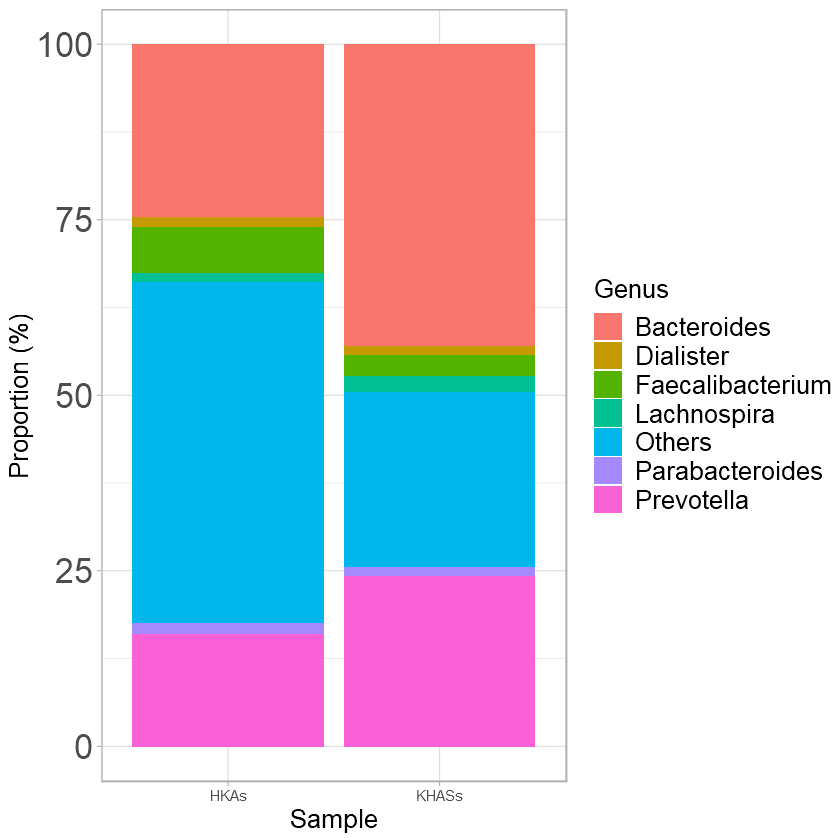

In [47]:
p <- ggplot(long) + geom_bar(aes(x=Sample, y=Proportion, fill=Genus), stat = "identity")+ theme_light() +
 ylab("Proportion (%)")  + theme(axis.title.y=element_text(size=15), axis.title.x=element_text(size=15)) +
theme(axis.text.y=element_text(size=20)) + theme(legend.text=element_text(size=15)) +theme(legend.title=element_text(size=15))
p


In [50]:
ggsave(paste0("KAHSs-vs-HKAs-genus-plot",'.tiff'),p, width=12, height=10, units="cm", dpi = 900)

In [51]:
taxa <- read.delim("Description_otu_table_L2.txt", sep='\t', row=1)
head(taxa)


,KAHSs,HKAs
k__Archaea;p__Euryarchaeota,0.00000000,3.696640e-04
k__Bacteria;p__Acidobacteria,0.00000000,2.659454e-07
k__Bacteria;p__Actinobacteria,0.00115989,1.653505e-02
k__Bacteria;p__BHI80-139,0.00000000,5.318907e-08
k__Bacteria;p__Bacteroidetes,0.72193357,4.701183e-01
k__Bacteria;p__Caldiserica,0.00000000,0.000000e+00


In [52]:
taxaStrings <- sapply(split,function(x) paste(x[1:2],collapse=";"))
ptaxa <- taxa
splitg <- strsplit(rownames(ptaxa),";")                               # Split and rejoin on lv7
ptaxaStrings <- sapply(splitg,function(x) paste(x[1:2],collapse=";")) # level 7 is species, 8 is strain
ptaxa <- rowsum(ptaxa,ptaxaStrings)                                    # Collapse by taxonomy name
ptaxa <- sweep(ptaxa,2,colSums(ptaxa),'/')
ptaxa <- ptaxa[order(rowMeans(ptaxa),decreasing=T),]
ptaxa

,KAHSs,HKAs
k__Bacteria;p__Bacteroidetes,7.219336e-01,4.701183e-01
k__Bacteria;p__Firmicutes,1.882570e-01,4.626799e-01
k__Bacteria;p__Proteobacteria,8.207149e-02,3.897036e-02
k__Bacteria;p__Actinobacteria,1.159890e-03,1.653505e-02
k__Bacteria;p__Verrucomicrobia,4.125819e-03,4.867066e-03
k__Bacteria;p__Fusobacteria,1.853706e-03,2.994119e-03
k__Bacteria;p__Tenericutes,5.349265e-04,2.187720e-03
k__Bacteria;p__Cyanobacteria,5.296302e-06,7.479979e-04
k__Archaea;p__Euryarchaeota,0.000000e+00,3.696640e-04
k__Bacteria;p__Synergistetes,5.296302e-06,1.913743e-04


In [53]:
p.filtered.taxa <- ptaxa * 100
etc.p <- ptaxa[ptaxa$KAHSs >= 0.01 & ptaxa$HKAs >= 0.01,]
#filtered.taxa <- gtaxa * 100
#traspose to add to map for later use
etc.p <- t(etc.p)
colnames(etc.p) <- gsub(".*;p__?", "", colnames(etc.p))
colnames(etc.p) <- gsub("_", "", colnames(etc.p))
colnames(etc.p) <- gsub(";.*","",colnames(etc.p))

head(etc.p)

,Bacteroidetes,Firmicutes,Proteobacteria
KAHSs,0.7219336,0.1882570,0.08207149
HKAs,0.4701183,0.4626799,0.03897036


In [54]:
etc.p <- as.data.frame(etc.p)
etc.p$Others <-  1- rowSums(etc.p)
etc.p

,Bacteroidetes,Firmicutes,Proteobacteria,Others
KAHSs,0.7219336,0.1882570,0.08207149,0.007737897
HKAs,0.4701183,0.4626799,0.03897036,0.028231482


In [55]:
rowname <- rownames(etc.p)
etc.p$Sample <- rowname
etc.p

,Bacteroidetes,Firmicutes,Proteobacteria,Others,Sample
KAHSs,0.7219336,0.1882570,0.08207149,0.007737897,KAHSs
HKAs,0.4701183,0.4626799,0.03897036,0.028231482,HKAs


In [56]:
df.p <- gather(etc.p,"Phylum", "Proportion", -Sample)
df.p$Proportion <- round(df.p$Proportion * 100,2)
df.p

Sample,Phylum,Proportion
KAHSs,Bacteroidetes,72.19
HKAs,Bacteroidetes,47.01
KAHSs,Firmicutes,18.83
HKAs,Firmicutes,46.27
KAHSs,Proteobacteria,8.21
HKAs,Proteobacteria,3.90
KAHSs,Others,0.77
HKAs,Others,2.82


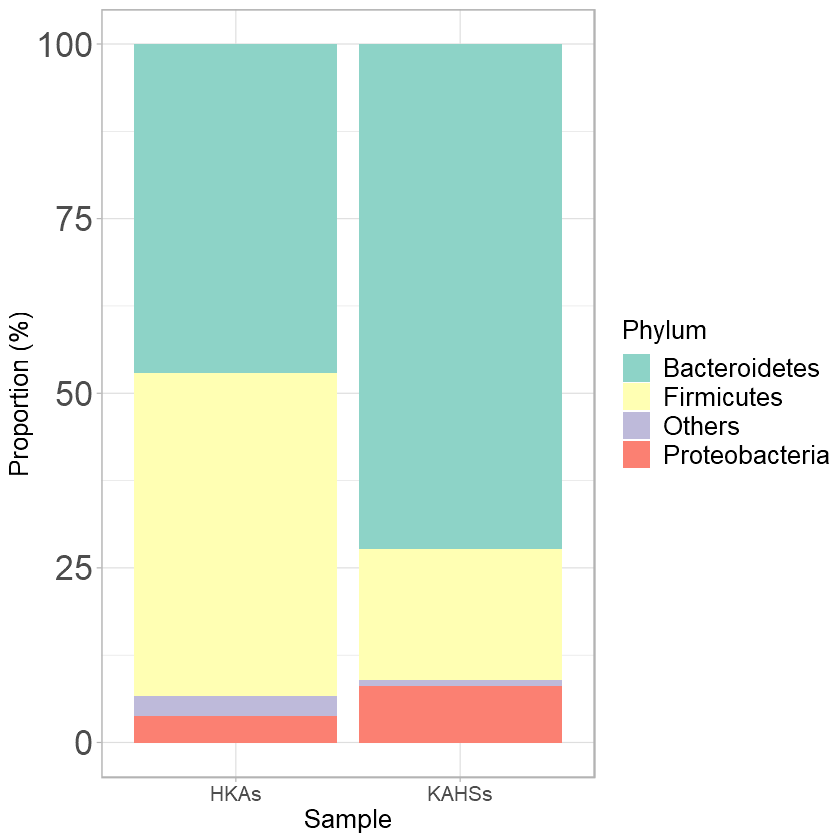

In [57]:
p <- ggplot(df.p) + geom_bar(aes(x=Sample, y=Proportion, fill=Phylum), stat = "identity") + theme_light() +
 ylab("Proportion (%)")  + theme(axis.title.y=element_text(size=15), axis.title.x=element_text(size=15)) +
theme(text=element_text(size=15)) + scale_fill_brewer(palette="Set3") +
theme(axis.text.y=element_text(size=20)) + theme(legend.text=element_text(size=15)) +theme(legend.title=element_text(size=15))
p 

In [59]:
ggsave(paste0("HKAs-vs-KAHSs-phylum-plot",'.tiff'), width=12, height=10, units="cm", dpi = 900)